In [1]:
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

# normalize
x_train = x_train/ 255
x_test = x_test / 255

# Create bags of mnist that contain a 7

In [3]:
def group_instances_bag(X, y, mean, std, size, digit):
    
    train_index = list(range(len(X)))
    random.shuffle(train_index)
    len_bags = np.random.normal(mean, std, size=(size)).astype(int)
    
    x = np.array([X[train_index[i]] for i in range(sum(len_bags))])
    y = np.array([y[train_index[i]] for i in range(sum(len_bags))])
    
    bags = []
    labels = []
    sum_ = 0
    for i in range(size):
        bags.append(x[sum_:sum_+len_bags[i]])
        labels.append(y[sum_:sum_+len_bags[i]])
        sum_ += len_bags[i]
        
    bag_label = [int(set(digit).issubset(list(label))) for label in labels]
    return bags, bag_label, labels

def get_dataset(X_train, y_train, X_test, y_test, mean, std, digit, sizes=[200,100]):
    train_bags, train_bag_label, train_labels = group_instances_bag(X_train, y_train, mean, std, sizes[0], digit)
    test_bags, test_bag_label, test_labels = group_instances_bag(X_test, y_test, mean, std, sizes[1], digit)
    return train_bags, train_bag_label, train_labels, test_bags, test_bag_label, test_labels

In [4]:
def plot_bag(bag, label_bag, label_instance, digit):
    fig, ax = plt.subplots(1,len(bag),figsize=(20,2.5))
    for i in range(len(bag)):
        #plotting images
        ax[i].axis('off')
        if label_instance[i] in digit and label_bag == 1:
            img_plot = ax[i].imshow(np.abs(bag[i]*255-255), cmap='gray', vmin=0, vmax=255)
        else:
            img_plot = ax[i].imshow(bag[i]*255, cmap='gray', vmin=0, vmax=255)
        ax[i].set_title(str(label_instance[i]))
    
    fig.suptitle("Bag label: {}".format(label_bag))
    plt.show()

In [5]:
train_bags, train_bag_labels, train_ins_labels, test_bags, test_bag_labels, test_ins_labels = get_dataset(x_train, y_train, 
                                                                                                        x_test, y_test, 
                                                                                                        10, 2, [7], sizes=[200,100])

In [6]:
np.save('mnist_bags_7.npy', [train_bags, train_bag_labels, train_ins_labels, test_bags, test_bag_labels, test_ins_labels])

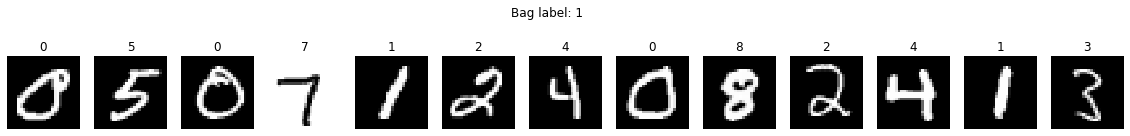

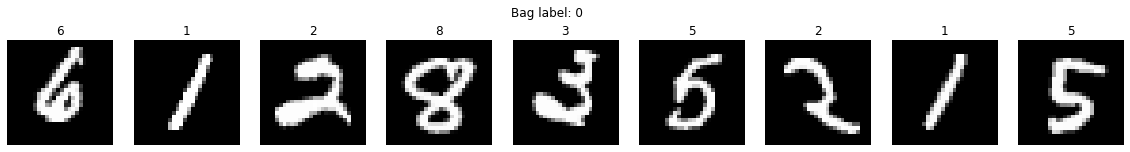

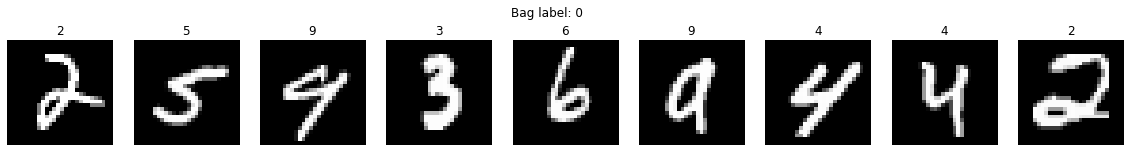

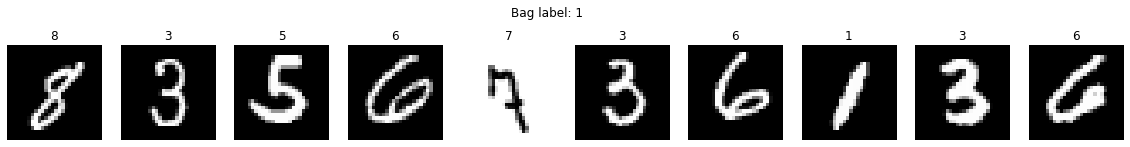

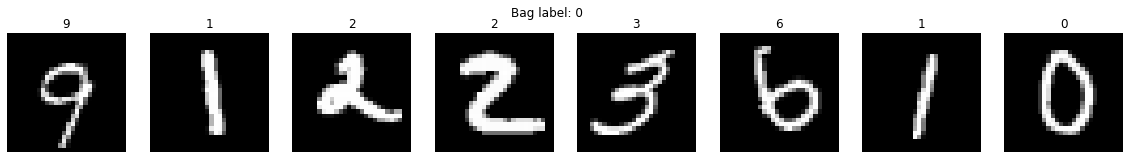

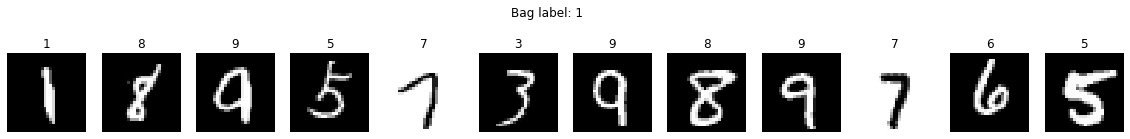

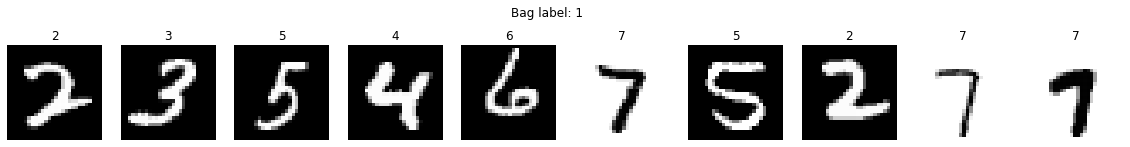

In [7]:
for i in range(7):
    plot_bag(train_bags[i], train_bag_labels[i], train_ins_labels[i], [7])

# Create bags of mnist that contain 2 digits. 2 and 3

In [8]:
train_bags, train_bag_label, train_labels, test_bags, test_bag_label, test_labels = get_dataset(x_train, y_train, x_test, y_test, 16, 2, [2,3], sizes=[200,100])

In [9]:
np.save('mnist_bags_2_and_3.npy', [train_bags, train_bag_label, train_labels, test_bags, test_bag_label, test_labels])

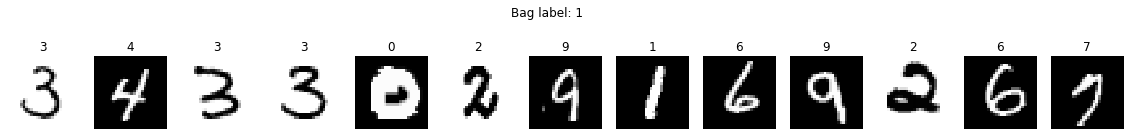

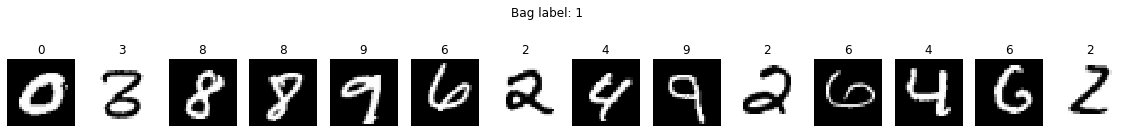

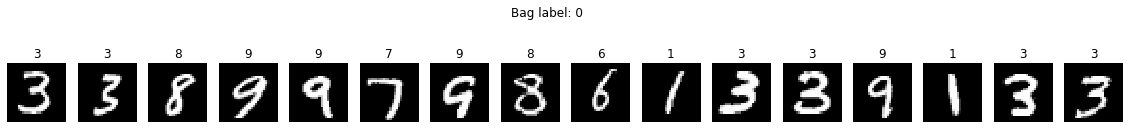

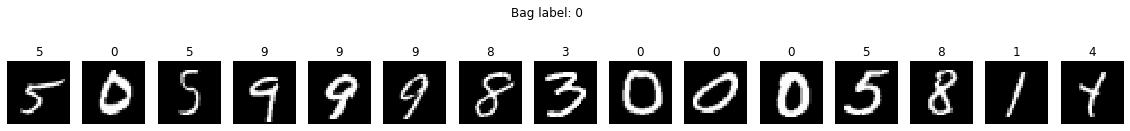

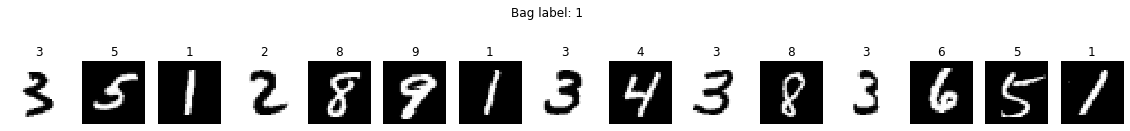

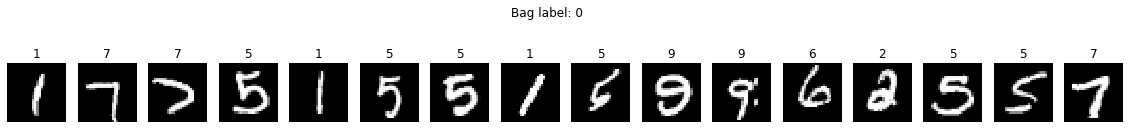

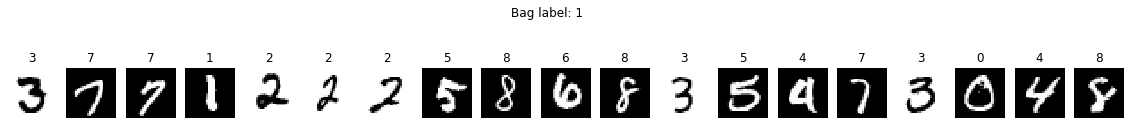

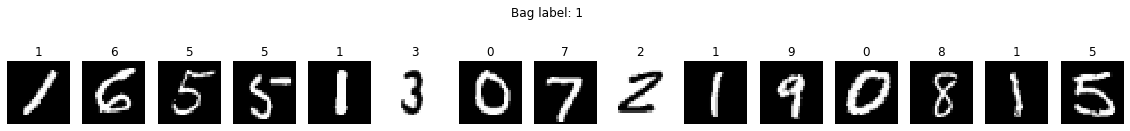

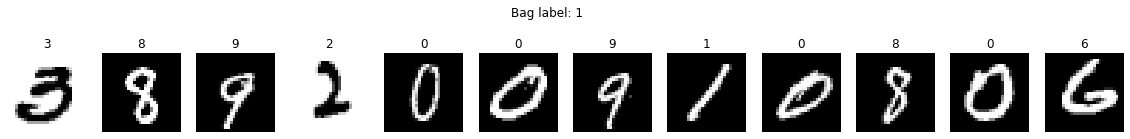

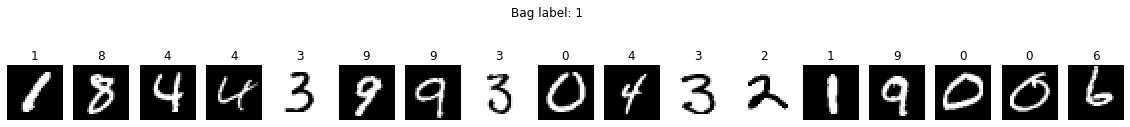

In [10]:
for i in range(10):
    plot_bag(train_bags[i], train_bag_label[i], train_labels[i], [2,3])

# Create bags of mnist succesive digits. 42

In [11]:
def group_instances_bag_consecutive(X, y, mean, std, size, str_digit):
    
    train_index = list(range(len(X)))
    random.shuffle(train_index)
    len_bags = np.random.normal(mean, std, size=(size)).astype(int)
    
    x = np.array([X[train_index[i]] for i in range(sum(len_bags))])
    y = np.array([y[train_index[i]] for i in range(sum(len_bags))])
    
    bags = []
    labels = []
    sum_ = 0
    for i in range(size):
        bags.append(x[sum_:sum_+len_bags[i]])
        labels.append(y[sum_:sum_+len_bags[i]])
        sum_ += len_bags[i]
        
    bag_label = [int(str_digit in str(label)) for label in labels]
    return bags, bag_label, labels

def get_dataset_consecutive(X_train, y_train, X_test, y_test, mean, std, digit, sizes=[200,100]):
    train_bags, train_bag_label, train_labels = group_instances_bag_consecutive(X_train, y_train, mean, std, sizes[0], digit)
    test_bags, test_bag_label, test_labels = group_instances_bag_consecutive(X_test, y_test, mean, std, sizes[1], digit)
    return train_bags, train_bag_label, train_labels, test_bags, test_bag_label, test_labels

In [12]:
def plot_bag(bag, label_bag, label_instance, digit):
    fig, ax = plt.subplots(1,len(bag),figsize=(20,2.5))
    drawed = False
    for i in range(len(bag)):
        #plotting images
        ax[i].axis('off')
        if label_instance[i] == digit[0] and label_bag == 1 and i!=(len(bag)-1):
            if label_instance[i+1] == digit[1]:
                img_plot = ax[i].imshow(np.abs(bag[i]*255-255), cmap='gray', vmin=0, vmax=255)
                drawed = True
            else:
                img_plot = ax[i].imshow(bag[i]*255, cmap='gray', vmin=0, vmax=255)
        elif drawed:
            img_plot = ax[i].imshow(np.abs(bag[i]*255-255), cmap='gray', vmin=0, vmax=255)
            drawed = False
        else:
            img_plot = ax[i].imshow(bag[i]*255, cmap='gray', vmin=0, vmax=255)
        ax[i].set_title(str(label_instance[i]))
    
    fig.suptitle("Bag label: {}".format(label_bag))
    plt.show()

In [13]:
train_bags, train_bag_label, train_labels, test_bags, test_bag_label, test_labels = get_dataset_consecutive(x_train, y_train, 
                                                                                                            x_test, y_test,
                                                                                                            16, 2, '4 2', 
                                                                                                            sizes=[200,100])

In [14]:
np.save('mnist_bags_42.npy', [train_bags, train_bag_label, train_labels, test_bags, test_bag_label, test_labels])

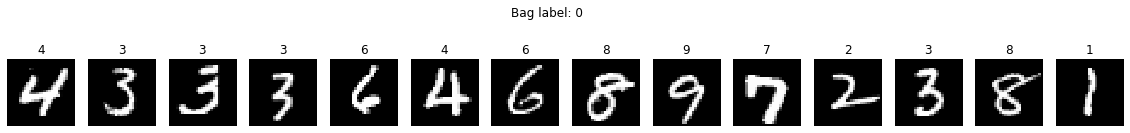

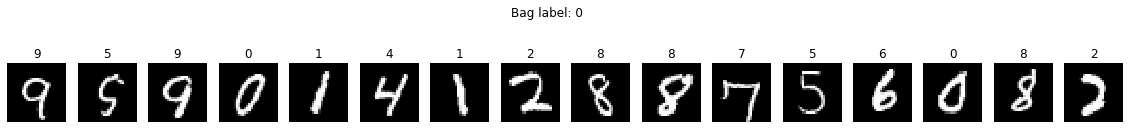

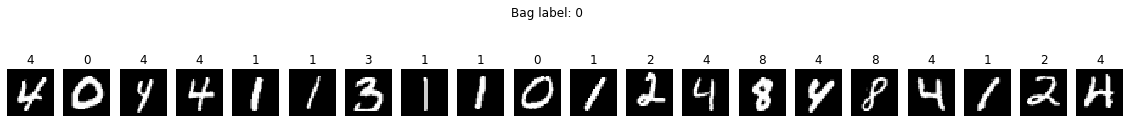

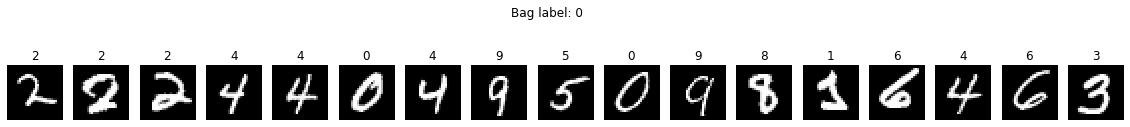

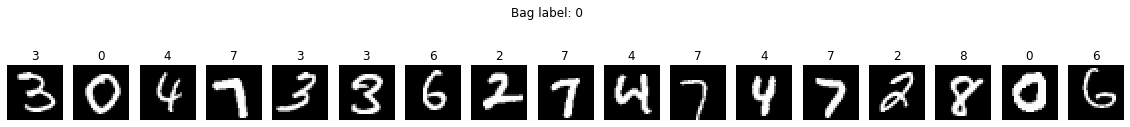

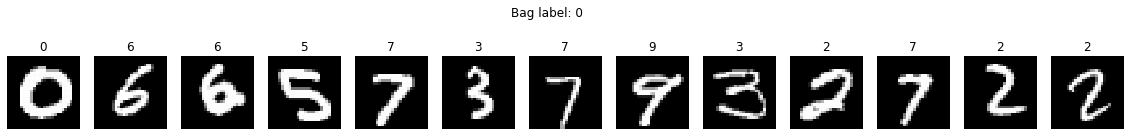

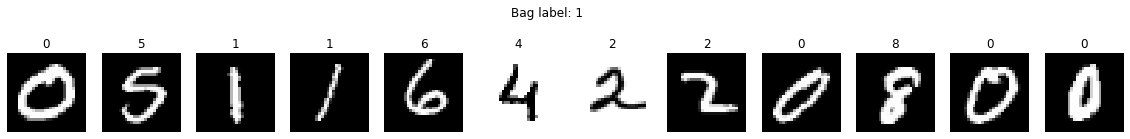

In [15]:
for i in range(7):
    plot_bag(train_bags[i], train_bag_label[i], train_labels[i], [4,2])